In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

C:\Users\uesr\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\uesr\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\uesr\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\uesr\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_final = pd.read_csv('final_df_cropin.csv')

In [5]:
X_final.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152
0,3459.0,2893.0,3157.0,2595.0,1795.0,1552.0,1601.0,1626.0,3697.0,3100.0,...,1303.0,2982.0,2449.0,2697.0,2271.0,1497.0,852.0,1067.0,1062.0,Wheat
1,3459.0,2883.0,3157.0,2595.0,1795.0,1692.0,1672.0,1675.0,3697.0,3084.0,...,1378.0,2982.0,2262.0,2697.0,2271.0,1497.0,1084.0,1208.0,1226.0,Wheat
2,3459.0,2858.0,3157.0,2595.0,1795.0,1566.0,1599.0,1634.0,3697.0,3102.0,...,1221.0,2982.0,2653.0,2697.0,2271.0,1497.0,887.0,1082.0,1057.0,Wheat
3,3459.0,2973.0,3157.0,2595.0,1795.0,1554.0,1640.0,1639.0,3697.0,3128.0,...,1366.0,2982.0,2858.0,2697.0,2271.0,1497.0,1193.0,1296.0,1225.0,Wheat
4,3551.0,2917.0,3200.0,2663.0,1771.0,1559.0,1603.0,1636.0,3698.0,3112.0,...,1285.0,3346.0,2707.0,2879.0,2558.0,1762.0,1056.0,1199.0,1097.0,Wheat
5,3551.0,3031.0,3200.0,2663.0,1771.0,1536.0,1643.0,1630.0,3698.0,3104.0,...,1411.0,3346.0,3077.0,2879.0,2558.0,1762.0,1416.0,1380.0,1275.0,Wheat
6,3551.0,2943.0,3200.0,2663.0,1771.0,1601.0,1644.0,1655.0,3698.0,3113.0,...,1346.0,3346.0,2845.0,2879.0,2558.0,1762.0,1210.0,1286.0,1167.0,Wheat
7,3551.0,2940.0,3200.0,2663.0,1771.0,1566.0,1640.0,1630.0,3698.0,3062.0,...,1387.0,3346.0,2857.0,2879.0,2558.0,1762.0,1482.0,1338.0,1281.0,Wheat
8,3378.0,2849.0,3065.0,2577.0,1846.0,1616.0,1644.0,1636.0,3672.0,3073.0,...,1284.0,3174.0,2643.0,2824.0,2415.0,1692.0,1163.0,1185.0,1173.0,Wheat
9,3498.0,3057.0,3231.0,2672.0,1863.0,1772.0,1769.0,1723.0,3768.0,3279.0,...,1267.0,2953.0,2543.0,2553.0,2193.0,1320.0,1006.0,1103.0,1096.0,Potato


In [6]:
X_final.shape

(3682, 153)

In [7]:
mul = [i*8 for i in list(range(20))]

In [8]:
ndvi_df = pd.DataFrame(pd.Series(X_final.iloc[:,-1]))
i= 0
for m in mul[:-1]:
    print("printing for t_",i)
    print(X_final.iloc[:,0+m:8+m].head(5))
    temp = X_final.iloc[:,0+m:8+m]
    ndvi = (temp.loc[:,temp.columns[1]] - temp.loc[:,temp.columns[5]]) / (temp.loc[:,temp.columns[1]] + temp.loc[:,temp.columns[5]])
    Xt1 = pd.DataFrame(ndvi)
    Xt1.columns = ["t_"+str(i)]
    ndvi_df = pd.concat([Xt1,ndvi_df],axis=1)
    print(ndvi_df.shape)
    print("------------------------------")
    i+=1

printing for t_ 0
    col_0   col_1   col_2   col_3   col_4   col_5   col_6   col_7
0  3459.0  2893.0  3157.0  2595.0  1795.0  1552.0  1601.0  1626.0
1  3459.0  2883.0  3157.0  2595.0  1795.0  1692.0  1672.0  1675.0
2  3459.0  2858.0  3157.0  2595.0  1795.0  1566.0  1599.0  1634.0
3  3459.0  2973.0  3157.0  2595.0  1795.0  1554.0  1640.0  1639.0
4  3551.0  2917.0  3200.0  2663.0  1771.0  1559.0  1603.0  1636.0
(3682, 2)
------------------------------
printing for t_ 1
    col_8   col_9  col_10  col_11  col_12  col_13  col_14  col_15
0  3697.0  3100.0  3349.0  2773.0  1918.0  1589.0  1691.0  1666.0
1  3697.0  3084.0  3349.0  2773.0  1918.0  1792.0  1754.0  1737.0
2  3697.0  3102.0  3349.0  2773.0  1918.0  1647.0  1644.0  1677.0
3  3697.0  3128.0  3349.0  2773.0  1918.0  1727.0  1715.0  1699.0
4  3698.0  3112.0  3349.0  2821.0  1892.0  1690.0  1720.0  1691.0
(3682, 3)
------------------------------
printing for t_ 2
   col_16  col_17  col_18  col_19  col_20  col_21  col_22  col_23
0  283

In [9]:
ndvi_df.head()

,t_18,t_17,t_16,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,t_0,col_152
0,0.483793,0.302974,0.228423,0.241088,0.149987,0.332093,0.403409,0.399592,0.469200,0.431997,0.371803,0.320369,0.177992,0.226540,0.227996,0.189982,0.224680,0.322244,0.301687,Wheat
1,0.352062,0.269134,0.265932,0.205990,0.131001,0.391623,0.412504,0.422966,0.383898,0.347933,0.363232,0.318631,0.180494,0.223647,0.252302,0.228296,0.248220,0.264971,0.260328,Wheat
2,0.498870,0.395626,0.266519,0.219128,0.149352,0.195386,0.454593,0.456865,0.502381,0.481459,0.412418,0.306370,0.199633,0.221841,0.231141,0.204126,0.238241,0.306380,0.292043,Wheat
3,0.411010,0.308629,0.276526,0.182205,0.126829,0.220949,0.458224,0.460533,0.493926,0.464677,0.404433,0.316540,0.185727,0.223673,0.284360,0.243753,0.278308,0.288568,0.313453,Wheat
4,0.438746,0.309938,0.226867,0.190780,0.133580,0.187692,0.480445,0.461727,0.513339,0.490245,0.393899,0.326309,0.179678,0.207652,0.247052,0.217391,0.249171,0.296127,0.303396,Wheat


In [10]:
ndvi_df.shape

(3682, 20)

In [11]:
c1 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_152']=='Wheat',:],axis=0))
c2 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_152']=='Potato',:],axis=0))
c3 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_152']=='Red_Lentils_Masoor',:],axis=0))
c4 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_152']=='Turmeric',:],axis=0))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

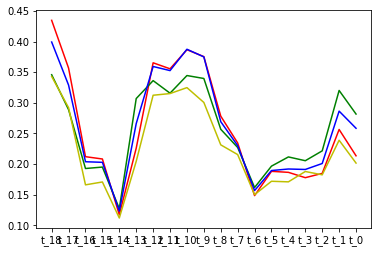

In [13]:
plt.plot(c1.index,c1.iloc[:,0],color='r')
plt.plot(c2.index,c2.iloc[:,0],color='g')
plt.plot(c3.index,c3.iloc[:,0],color='b')
plt.plot(c4.index,c4.iloc[:,0],color='y')

In [14]:
ndvi_df['avg_ndvi'] = np.mean(ndvi_df,axis=1)

In [39]:
pd.pivot_table(ndvi_df,index=["col_152"],values = ['avg_ndvi'] ,aggfunc=np.mean)

,avg_ndvi
col_152,
Potato,0.256700
Red_Lentils_Masoor,0.261795
Turmeric,0.225968
Wheat,0.258306


In [36]:
ndvi_df.head(20)

,t_18,t_17,t_16,t_15,t_14,t_13,t_12,t_11,t_10,t_9,...,t_7,t_6,t_5,t_4,t_3,t_2,t_1,t_0,col_152,avg_ndvi
0,0.483793,0.302974,0.228423,0.241088,0.149987,0.332093,0.403409,0.399592,0.469200,0.431997,...,0.320369,0.177992,0.226540,0.227996,0.189982,0.224680,0.322244,0.301687,Wheat,0.305571
1,0.352062,0.269134,0.265932,0.205990,0.131001,0.391623,0.412504,0.422966,0.383898,0.347933,...,0.318631,0.180494,0.223647,0.252302,0.228296,0.248220,0.264971,0.260328,Wheat,0.290693
2,0.498870,0.395626,0.266519,0.219128,0.149352,0.195386,0.454593,0.456865,0.502381,0.481459,...,0.306370,0.199633,0.221841,0.231141,0.204126,0.238241,0.306380,0.292043,Wheat,0.317493
3,0.411010,0.308629,0.276526,0.182205,0.126829,0.220949,0.458224,0.460533,0.493926,0.464677,...,0.316540,0.185727,0.223673,0.284360,0.243753,0.278308,0.288568,0.313453,Wheat,0.312754
4,0.438746,0.309938,0.226867,0.190780,0.133580,0.187692,0.480445,0.461727,0.513339,0.490245,...,0.326309,0.179678,0.207652,0.247052,0.217391,0.249171,0.296127,0.303396,Wheat,0.308107
5,0.369686,0.257227,0.217415,0.146028,0.111353,0.186300,0.461399,0.448771,0.497938,0.478908,...,0.318616,0.165101,0.209134,0.290904,0.267675,0.288119,0.284502,0.327348,Wheat,0.300938
6,0.403206,0.286738,0.222625,0.207682,0.121545,0.240632,0.463289,0.450041,0.509070,0.496447,...,0.352960,0.187309,0.239816,0.287663,0.239491,0.284675,0.293849,0.295335,Wheat,0.314422
7,0.316893,0.233589,0.203559,0.161916,0.100415,0.221020,0.442536,0.433004,0.492063,0.471617,...,0.324359,0.173254,0.220693,0.297513,0.281310,0.284311,0.293894,0.304927,Wheat,0.296763
8,0.388860,0.293038,0.234350,0.206683,0.117679,0.299176,0.424819,0.432844,0.495916,0.480216,...,0.302296,0.184408,0.221604,0.312796,0.276699,0.269967,0.326570,0.276148,Wheat,0.312621
9,0.433080,0.311615,0.114661,0.123772,0.090764,0.224869,0.376393,0.367288,0.342636,0.362299,...,0.164735,0.122847,0.134305,0.115538,0.129259,0.135744,0.287144,0.266101,Potato,0.227839


In [16]:
y_final = ndvi_df.iloc[:,-2]

In [17]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_final)
encoded_Y = encoder.transform(y_final)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = keras.utils.to_categorical(encoded_Y,num_classes=4) 

In [18]:
encoded_Y[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 0], dtype=int64)

In [19]:
dummy_y[0]

array([0., 0., 0., 1.], dtype=float32)

In [20]:
X_model =ndvi_df.drop(columns=['col_152'])

In [21]:
X_model.head(10)

,t_18,t_17,t_16,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,t_0,avg_ndvi
0,0.483793,0.302974,0.228423,0.241088,0.149987,0.332093,0.403409,0.399592,0.469200,0.431997,0.371803,0.320369,0.177992,0.226540,0.227996,0.189982,0.224680,0.322244,0.301687,0.305571
1,0.352062,0.269134,0.265932,0.205990,0.131001,0.391623,0.412504,0.422966,0.383898,0.347933,0.363232,0.318631,0.180494,0.223647,0.252302,0.228296,0.248220,0.264971,0.260328,0.290693
2,0.498870,0.395626,0.266519,0.219128,0.149352,0.195386,0.454593,0.456865,0.502381,0.481459,0.412418,0.306370,0.199633,0.221841,0.231141,0.204126,0.238241,0.306380,0.292043,0.317493
3,0.411010,0.308629,0.276526,0.182205,0.126829,0.220949,0.458224,0.460533,0.493926,0.464677,0.404433,0.316540,0.185727,0.223673,0.284360,0.243753,0.278308,0.288568,0.313453,0.312754
4,0.438746,0.309938,0.226867,0.190780,0.133580,0.187692,0.480445,0.461727,0.513339,0.490245,0.393899,0.326309,0.179678,0.207652,0.247052,0.217391,0.249171,0.296127,0.303396,0.308107
5,0.369686,0.257227,0.217415,0.146028,0.111353,0.186300,0.461399,0.448771,0.497938,0.478908,0.391389,0.318616,0.165101,0.209134,0.290904,0.267675,0.288119,0.284502,0.327348,0.300938
6,0.403206,0.286738,0.222625,0.207682,0.121545,0.240632,0.463289,0.450041,0.509070,0.496447,0.391645,0.352960,0.187309,0.239816,0.287663,0.239491,0.284675,0.293849,0.295335,0.314422
7,0.316893,0.233589,0.203559,0.161916,0.100415,0.221020,0.442536,0.433004,0.492063,0.471617,0.381630,0.324359,0.173254,0.220693,0.297513,0.281310,0.284311,0.293894,0.304927,0.296763
8,0.388860,0.293038,0.234350,0.206683,0.117679,0.299176,0.424819,0.432844,0.495916,0.480216,0.395734,0.302296,0.184408,0.221604,0.312796,0.276699,0.269967,0.326570,0.276148,0.312621
9,0.433080,0.311615,0.114661,0.123772,0.090764,0.224869,0.376393,0.367288,0.342636,0.362299,0.225888,0.164735,0.122847,0.134305,0.115538,0.129259,0.135744,0.287144,0.266101,0.227839


In [22]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_model, encoded_Y, test_size=0.05, random_state=42,shuffle = True)

In [23]:
X_train_ml.shape,y_train_ml.shape

((3497, 20), (3497,))

In [24]:
X_test_ml.shape,y_test_ml.shape

((185, 20), (185,))

In [25]:
#models

In [26]:
#RandomForrest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our model with 500 trees
rf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# Fit our model to training data
rf = rf.fit(X_train_ml, y_train_ml)

y_pred = rf.predict(X_test_ml)

from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(y_test_ml, y_pred))

C:\Users\uesr\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy 0.8


In [28]:
#important features
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.05)

# Train the selector
sfm.fit(X_train_ml, y_train_ml)

for feature_list_index in sfm.get_support(indices=True):
    print(X_train_ml.columns[feature_list_index])
    

t_18
t_17
t_14
t_13
t_11
t_10
t_6
t_1
t_0


In [29]:
#Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X_train_ml, y_train_ml)

y_pred = model.predict(X_test_ml)

from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(y_test_ml, y_pred))

Accuracy 0.6864864864864865


In [31]:
#Xgboost Classifier

In [32]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.7,
 objective= 'multi:softmax',
 #num_class = 4,                     
 nthread=6,
 scale_pos_weight=1,
 seed=27)

model.fit(X_train_ml, y_train_ml)

y_pred = model.predict(X_test_ml)

from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(y_test_ml, y_pred))

C:\Users\uesr\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy 0.8162162162162162


C:\Users\uesr\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
#KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

model4.fit(X_train_ml, y_train_ml)

y_pred = model4.predict(X_test_ml)

from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(y_test_ml, y_pred))

Accuracy 0.8
